In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

In [9]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import string
import re

In [5]:
import pandas as pd
data=pd.read_csv("Elon_musk.csv",encoding='unicode_escape',error_bad_lines=False) 
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
data.drop('Unnamed: 0',inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
def cleanTxt(text):
    text = re.sub(r'\\u[A-Za-z0-9]+','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub('[0-9]', '', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub('[_AA_]','',text)
    text = re.sub('[<U+F>]','',text)
    text = re.sub('[&]','',text)
    text = re.sub('[;,?]','',text)
    return text

In [10]:
data['Text'] = data['Text'].apply(cleanTxt)
data

,Text
0,Im an alien
1,Carmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,True it sounds so surreal but the negative pr...
1995,Make sure to read ur terms amp conditions bef...
1996,Samwise Gamgee
1997,ltho Dumb and Dumber is


In [11]:
nlp = spacy.load('en_core_web_sm')


In [12]:
one_block = data.Text[35]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 


In [13]:
one_block

' Doge appears to be inflationary but is not meaningfully so (fixed # of coins per unit time) whereas '

In [14]:
for token in doc_block[0:30]:
    print(token, token.pos_) 

  SPACE
Doge PROPN
appears VERB
to PART
be VERB
inflationary ADJ
but CCONJ
is VERB
not PART
meaningfully ADV
so ADV
( PUNCT
fixed VERB
# NOUN
of ADP
coins NOUN
per ADP
unit NOUN
time NOUN
) PUNCT
whereas SCONJ


In [15]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:30]) 

['coins', 'unit', 'time']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [18]:
wf_df[0:35] 

,word,count
0,appears,1
1,be,1
2,is,1
3,fixed,1
4,coins,1
5,unit,1
6,time,1


In [19]:
#Sentiment analysis

In [21]:
affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [22]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data.Text))
sentences[0:30] 

[' I\x92m an alien Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it  Great interview!',
 'Doge is underestimated  Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'rodo was the underdoge ll thought he would fail Himself most of all.',
 'Haha thanks :)  Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with    It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler  He definitely has issues but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   ny crypto wallet that won\x92t give you your private keys should be avoided at all costs  Your app sucks RT : NS has selected alcon Heavy to launch the first two elements of the lunar Gateway together on one mission!',
 'Yes   Once we ca

In [23]:
sent_df = pd.DataFrame(sentences, columns=['Text'])
sent_df

,Text
0,Im an alien Carmack Ray tracing on Cyberpunk...
1,Have you tried it Great interview!
2,Doge is underestimated Congratulations Tesla ...
3,Now on to the next for even more!!
4,Happy New Year of the Ox!
...,...
879,Not actually a payout just a vesting of stock ...
880,It may never pay out as the stock cant b No...
881,Details ug .
882,I symbiosis while u wait Theres some of that...


In [25]:
affinity_scores = affin.set_index('word')['value'].to_dict() 

In [26]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [27]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [29]:
calculate_sentiment(text = 'amazing') 


4

In [30]:
sent_df['sentiment_value'] = sent_df['Text'].apply(calculate_sentiment)

In [33]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['Text'].str.split().apply(len)
sent_df['word_count'].head() 

0    12
1     6
2    11
3     8
Name: word_count, dtype: int64

In [32]:
sent_df 

,Text,sentiment_value,word_count
0,Im an alien Carmack Ray tracing on Cyberpunk...,0,12
1,Have you tried it Great interview!,3,6
2,Doge is underestimated Congratulations Tesla ...,3,11
3,Now on to the next for even more!!,0,8
4,Happy New Year of the Ox!,3,6
...,...,...,...
879,Not actually a payout just a vesting of stock ...,0,10
880,It may never pay out as the stock cant b No...,-4,29
881,Details ug .,0,3
882,I symbiosis while u wait Theres some of that...,-2,42


In [34]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,Text,sentiment_value,word_count
624,Its not useful for predicting the future nor ...,12,94
176,lso w Oh and umm I absolutely support tran...,12,87
41,Cryoproof then install engines Starship SN amp...,12,67
80,This is a good one I whistle Ryan RHM Cybertr...,13,31
617,Its Tesla Germany designed amp built the va...,13,56
34,Yes but engines have a min throttle point wher...,15,198
688,We just havent observed the sci Pretty much ...,16,54
103,Was also thinking that SpaceX Boca should hold...,16,78
569,We also built our first demonstration tunnel/v...,16,94
562,The open areas Shaped like a diamond amp a...,19,132


In [35]:
sent_df['sentiment_value'].describe() 

count    884.000000
mean       1.493213
std        2.871928
min      -10.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [36]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,Text,sentiment_value,word_count
0,Im an alien Carmack Ray tracing on Cyberpunk...,0,12
3,Now on to the next for even more!!,0,8
5,rodo was the underdoge ll thought he would fai...,-2,13
7,Tweets definitely do not represent real-world ...,0,8
9,Yes Once we can predict cash flow reasonably...,0,21


In [37]:
sent_df[sent_df['sentiment_value']>=18].head() 

,Text,sentiment_value,word_count
562,The open areas Shaped like a diamond amp a...,19,132


In [38]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

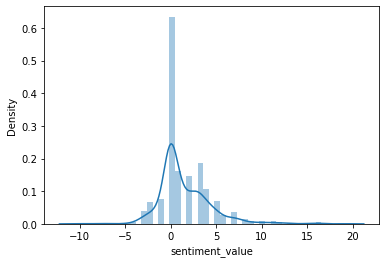

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

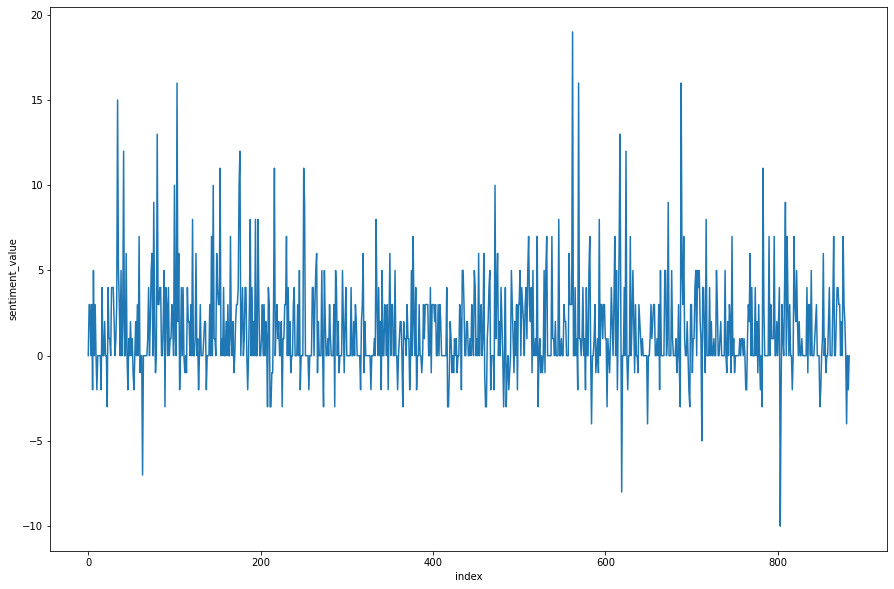

In [40]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

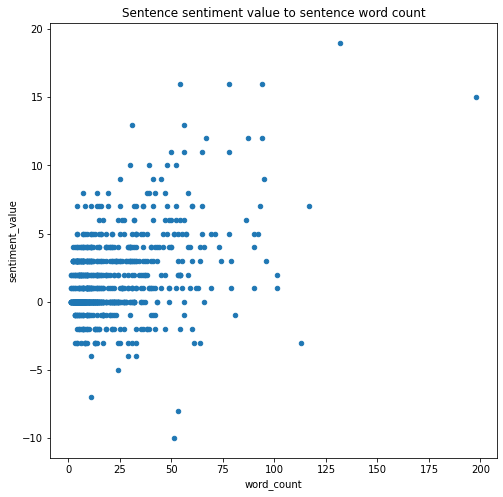

In [42]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')